# Python Cheatsheets - DATA ANALYSIS

## Data Manipulation

### Pandas
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. It is built on numpy and matplotlib libraries. It provides high-performance, easy-to-use data structures and data analysis tools for Python. 

More information: https://pandas.pydata.org/

In [ ]:
# RUN IF PANDAS IS NOT INSTALLED

# install pandas either with conda or with pip
# conda install -c conda-forge pandas
%pip install pandas
%pip install numerize

# verify if it is installed
# pip show pandas
# pip show numerize

In [143]:
# import necessary libraries for pandas and other necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from numerize.numerize import numerize

#### 1) Data Classes

Pandas has two types of classes to handle data: __Series__ and __DataFrame__

- __Series:__ A one-dimensional labeled array holding data of any type such as integers, strings, Python objects etc.

In [3]:
# create a series by passing a list of values
s = pd.Series([1, 3, 4, np.nan, 6, 9])
print("Type: ",type(s), end="\n")
print(s)

Type:  <class 'pandas.core.series.Series'>
0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    9.0
dtype: float64


- __DataFrame:__ A two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

_DataFrame from a dictionary of lists:_ A DataFrame can be created by passing a _dictionary_ of lists where the keys are the labels and the values are the values.

In [4]:
# create a DataFrame with a dictionary
names = ['Germany', 'Australia', 'Japan', 'India', 'China', 'United Kingdom']
cap =  ['Berlin', 'Canberra', 'Tokyo', 'New Delhi', 'Beijing', 'London']
pop = [84552242, 26713205, 123753041, 1450935791, 1419321278, 69138192]
codes = ['DE', 'AU', 'JP', 'IN', 'CN', 'GB']

# create dictionary my_dict with three key:value pairs: my_dict
my_dict = {
    'Country':names,
    'Capital':cap,
    'Population':pop
}

# build a DataFrame countries from my_dict: countries
countries = pd.DataFrame(my_dict)
countries.index = codes

# save the data as a csv file for the latter exercises
countries.to_csv("data/countries.csv")

# print DataFrame
print("Type: ",type(countries), end="\n")
print(countries)

Type:  <class 'pandas.core.frame.DataFrame'>
           Country    Capital  Population
DE         Germany     Berlin    84552242
AU       Australia   Canberra    26713205
JP           Japan      Tokyo   123753041
IN           India  New Delhi  1450935791
CN           China    Beijing  1419321278
GB  United Kingdom     London    69138192


_DataFrame from a list of dictionaries:_ A DataFrame can also be created by passing a _list_ of _dictionary_ objects.

In [94]:
# create a list of dictionaries with new data
orange_list = [
    {"date": "2018-11-03", "sold": 10376832},
    {"date": "2018-11-10", "sold": 10717154},
]

# convert list into DataFrame
orange_sales = pd.DataFrame(orange_list)

# print DataFrame
print(orange_sales)

         date      sold
0  2018-11-03  10376832
1  2018-11-10  10717154


_DataFrame from a source file:_ Putting data in a dictionary and then building a DataFrame is not very efficient while dealing with millions of observations. A DataFrame can also be created by reading data from a _source file_ where the data is typically available with a regular structure. An example is the CSV file, which is short for "comma-separated values".

In [57]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
countries = pd.read_csv('data/countries.csv', index_col=0)

# print out the data
print(countries)

           Country    Capital  Population
DE         Germany     Berlin    84552242
AU       Australia   Canberra    26713205
JP           Japan      Tokyo   123753041
IN           India  New Delhi  1450935791
CN           China    Beijing  1419321278
GB  United Kingdom     London    69138192


#### 2) Exploring Data

Pandas has several methods to explore a data and get a sense of its contents. 

__Methods:__
- __head():__ It returns the first few rows of the DataFrame
- __info():__ It displays the names of the columns, the data types they contain, and whether they have any missing values
- __describe():__ It computes some summary statistics for numerical columns

__Attributes:__
- __shape:__ It contains a tuple that holds the number of rows followed by the number of columns
- __values:__ It contains the data values in a 2D NumPy array
- __columns:__ It contains the column names
- __index:__ It contains row numbers or row names


In [68]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

# check the shape of the DataFrame
print("Shape:", countries.shape)

# check the index and columns of the DataFrame
print("Index:", countries.index)
print("Columns:", countries.columns)

# explore the countries data with info
print(countries.info())

Shape: (6, 3)
Index: Index(['DE', 'AU', 'JP', 'IN', 'CN', 'GB'], dtype='object')
Columns: Index(['Country', 'Capital', 'Population'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, DE to GB
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     6 non-null      object
 1   Capital     6 non-null      object
 2   Population  6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 364.0+ bytes
None


#### 3) Indexing and Selecting Data

- __Square Brackets:__ The simplest, but not the most powerful way, to index and select is to use square brackets.

    - Single square brackets ([]) return a Pandas Series.
    - Double square brackets ([[]]) return a Pandas DataFrame.

In [69]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

# print out country column as Pandas Series
print("Country column as a Pandas Series:")
print(countries['Country']) 

# print out country and population columns as Pandas DataFrame
print("\nCountry and Population columns as a Pandas DataFrame:") 
print(countries[['Country', 'Population']]) 

Country column as a Pandas Series:
DE           Germany
AU         Australia
JP             Japan
IN             India
CN             China
GB    United Kingdom
Name: Country, dtype: object

Country and Population columns as a Pandas DataFrame:
           Country  Population
DE         Germany    84552242
AU       Australia    26713205
JP           Japan   123753041
IN           India  1450935791
CN           China  1419321278
GB  United Kingdom    69138192


- __Selecting Rows with Slicing:__ Use slices to select specific rows or observations. We can only select rows using square brackets if we specify a slice, like 0:4, using the integer indexes of the rows and not the row labels.

In [70]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

# print out first 3 observations
print(countries[:3], end="\n\n")

# print out fourth, fifth and sixth observation
print(countries[3:6])

      Country   Capital  Population
DE    Germany    Berlin    84552242
AU  Australia  Canberra    26713205
JP      Japan     Tokyo   123753041

           Country    Capital  Population
IN           India  New Delhi  1450935791
CN           China    Beijing  1419321278
GB  United Kingdom     London    69138192


- ```loc``` __and__ ```iloc```__:__

    - ```loc``` is label-based, using row and column labels.
    - ```iloc``` is index-based, using integer positions.

Pandas also allows to designate any column as an index. Setting a column as index is done with the ```.set_index()``` method while ```.reset_index()``` is used to reset the index to initial version. Setting the __drop__ parameter __True__ drops the newly set index column from the DataFrame. It is also possible to sort the DataFrame by index using the ```.sort_index()``` method. Setting the __level__ parameter defines the leves to sort by and __ascending__ parameters defines the type of the sorting to be done. The syntax is as below:
```python
df.set_index("col_A")
df.reset_index(drop=True)
df.sort_index(level=["col_A", "col_B"], ascending=[True, False])
```

In [76]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

# print out observation for Japan as Pandas Series
print(countries.loc['JP'], end="\n\n")

# print out observations for Australia and China as Pandas DataFrame
print(countries.loc[['AU','CN']].sort_index(level="Capital", ascending=False), end="\n\n")

# check loc and iloc results the same for Pandas Series
print("loc['JP'] results the same as iloc[2]: ", countries.loc['JP'].equals(countries.iloc[2]))

# check loc and iloc results the same for Pandas DataFrame
print("loc[['AU','CN']] results the same as iloc[[1, 4]]: ", countries.loc[['AU','CN']].equals(countries.iloc[[1,4]]))

Country           Japan
Capital           Tokyo
Population    123753041
Name: JP, dtype: object

      Country   Capital  Population
CN      China   Beijing  1419321278
AU  Australia  Canberra    26713205

loc['JP'] results the same as iloc[2]:  True
loc[['AU','CN']] results the same as iloc[[1, 4]]:  True


- __Combining Rows and Columns:__ Use ```loc``` and ```iloc``` to select specific rows and columns simultaneously.

In [62]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

# print out Population value of India
print("Population of India: ", countries.loc['IN', 'Population'], end="\n\n")

# print out Population column as Pandas Series
print(countries.loc[:,'Population'], end="\n\n")

# print out Capital value of Germany as Pandas DataFrame
print(countries.loc[['DE'],['Capital']], end="\n\n")

# print sub-DataFrame as Pandas DataFrame
print(countries.loc[['IN','GB'],['Country','Population']], end="\n\n")

# check loc and iloc results the same
print("loc['IN', 'Population'] results the same as iloc[3, 2]: ", countries.loc['IN', 'Population'] == countries.iloc[3, 2])

# check loc and iloc results the same for Pandas Series
print("loc[:,'Population'] results the same as iloc[:, 2]: ", countries.loc[:,'Population'].equals(countries.iloc[:, 2]))

# check loc and iloc results the same for Pandas DataFrame
print("loc[['IN','GB'],['Country','Population']] results the same as iloc[[3, 5], [0, 2]]: ", 
      countries.loc[['IN','GB'],['Country','Population']].equals(countries.iloc[[3, 5], [0, 2]]))

Population of India:  1450935791

DE      84552242
AU      26713205
JP     123753041
IN    1450935791
CN    1419321278
GB      69138192
Name: Population, dtype: int64

   Capital
DE  Berlin

           Country  Population
IN           India  1450935791
GB  United Kingdom    69138192

loc['IN', 'Population'] results the same as iloc[3, 2]:  True
loc[:,'Population'] results the same as iloc[:, 2]:  True
loc[['IN','GB'],['Country','Population']] results the same as iloc[[3, 5], [0, 2]]:  True


- __Selecting with ```.query()```:__ Accepts an input string to determine which rows are returned. Within the statement, comparison operators (```<```, ```<=```, ```>```, ```>=```, ```==```, and ```!=```) and boolean operators (```and```, ```or``` and ```not```) can be used. The syntax is as below:

```python
df.query("SOME SELECTION STATEMENT")
```

In [147]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

print("Countries with population larger than 50M which are not UK:")
print(countries.query("Population > 50000000 and Country != 'United Kingdom'"))

Countries with population larger than 50M which are not UK:
    Country    Capital  Population
DE  Germany     Berlin    84552242
JP    Japan      Tokyo   123753041
IN    India  New Delhi  1450935791
CN    China    Beijing  1419321278


#### 4) Sorting and Filtering Data

Exploring and understanding data in a DataFrame is often easier with ordered rows. It is possible to sort the rows by passing a column name to ```.sort_values()```. To sort by multiple columns, a list of column names is passed to the function call.

```python
df.sort_values("column_1")                                             # sorting by one column
df.sort_values(["column_1", "column_2"])                               # sorting by multiple columns
df.sort_values("column_1", ascending = False)                          # sorting by one column in descending order
df.sort_values(["column_1", "column_2"], ascending = [True, False])    # sorting by multiple columns in varying orders
```

In [131]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

# sort countries by country names in descending order
countries_sorted = countries.sort_values("Country", ascending = False)

# print sorted data
print(countries_sorted.head())

           Country    Capital  Population
GB  United Kingdom     London    69138192
JP           Japan      Tokyo   123753041
IN           India  New Delhi  1450935791
DE         Germany     Berlin    84552242
CN           China    Beijing  1419321278


Comparison operators and NumPy logical operators are useful for filtering Pandas DataFrame by certain criteria. In order to filter, a boolean type of Pandas Series is necessary which can be obtained by using comparison and logical operators over DataFrame columns. To filter for multiple conditions at once, NumPy logical operators, ```np.logical_and()```, ```np.logical_or()``` etc., or "bitwise" operators, ```&```, ```|``` etc., are used.

In [132]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

# subset countries by population with comparison operators
highly_pop = countries[countries['Population'] > 1000000000]

# subset countries by population with numpy logical operators
#middle_pop = countries[np.logical_and(countries['Population'] > 50000000, countries['Population'] < 1000000000)]

# subset countries by population with bitwise logical operators
middle_pop = countries[
    (countries['Population'] > 50000000) & 
    (countries['Population'] < 1000000000)]

# print subset data
print("Highly populated countries are: \n", highly_pop)
print("\nMiddle populated countries are: \n", middle_pop)

Highly populated countries are: 
    Country    Capital  Population
IN   India  New Delhi  1450935791
CN   China    Beijing  1419321278

Middle populated countries are: 
            Country Capital  Population
DE         Germany  Berlin    84552242
JP           Japan   Tokyo   123753041
GB  United Kingdom  London    69138192


Filtering data based on categorical variables often involves using the logical "or" operators, ```np.logical_or()``` or ```|```, to select rows from multiple categories. A more feasible and shorter way is to use the ```.isin()``` method, which allows writing one condition instead of separate ones.

In [133]:
# define a list of desired capitals
capitals = ["Berlin", "Tokyo", "New Delhi"]

# filter the countries with isin call
c_filtered = countries[countries["Capital"].isin(capitals)]

# print subset data
print("Countries with selected capitals are: \n", c_filtered)

Countries with selected capitals are: 
     Country    Capital  Population
DE  Germany     Berlin    84552242
JP    Japan      Tokyo   123753041
IN    India  New Delhi  1450935791


#### 5) Iterating Over Data

Iterating over a Pandas DataFrame is typically done with the ```.iterrows()``` method. A for loop with ```.iterrows()``` iterates over every observation and on every iteration the row label and contents are available as:

```python
for lab, row in df.iterrows():
    ...
```

In [134]:
# read the countries data
#countries = pd.read_csv('data/countries.csv', index_col = 0)

for lab, row in countries.iterrows() :
    print(lab + ": " + row["Country"]) # also row.Country is suitable

DE: Germany
AU: Australia
JP: Japan
IN: India
CN: China
GB: United Kingdom


However, iterating over a DataFrame results in creating a new Pandas Series at each iteration, which is not very efficient!

#### 6) Manipulating Data

- __Add Column:__ Adding new columns to a DataFrame has many names, such as transforming, mutating, and feature engineering. It is possibe to generate new columns from scratch or by deriving them from existing columns. To add a column to a Pandas DataFrame by calling a function on another column ```.apply()``` call is used.

In [88]:
# copy the countries DataFrame to avoid reflecting the changes on the original
c_copy = countries.copy()

# add a column with population in millions
c_copy["Pop_M"] = c_copy["Population"] / 1000000

# add a column with capitalized country names
c_copy["Country_Upper"] = c_copy["Country"].apply(str.upper)

# add a column with population in human readable format
c_copy["Pop_Readable"] = c_copy["Population"].apply(numerize)

# print the reulting DataFrame with new columns
print(c_copy[["Country_Upper", "Capital", "Pop_M", "Pop_Readable"]])

     Country_Upper    Capital        Pop_M Pop_Readable
DE         GERMANY     Berlin    84.552242       84.55M
AU       AUSTRALIA   Canberra    26.713205       26.71M
JP           JAPAN      Tokyo   123.753041      123.75M
IN           INDIA  New Delhi  1450.935791        1.45B
CN           CHINA    Beijing  1419.321278        1.42B
GB  UNITED KINGDOM     London    69.138192       69.14M


- __Delete Column:__ 

In [89]:
d_copy = c_copy.drop(columns=["Pop_M", "Country"])
print(d_copy)

      Capital  Population   Country_Upper Pop_Readable
DE     Berlin    84552242         GERMANY       84.55M
AU   Canberra    26713205       AUSTRALIA       26.71M
JP      Tokyo   123753041           JAPAN      123.75M
IN  New Delhi  1450935791           INDIA        1.45B
CN    Beijing  1419321278           CHINA        1.42B
GB     London    69138192  UNITED KINGDOM       69.14M


- __Rename Column:__ 

In [90]:
r_copy = d_copy.rename(columns={"Country_Upper": "Country", "Pop_Readable": "Readable"})[["Country", "Capital", "Population", "Readable"]]
print(r_copy)

           Country    Capital  Population Readable
DE         GERMANY     Berlin    84552242   84.55M
AU       AUSTRALIA   Canberra    26713205   26.71M
JP           JAPAN      Tokyo   123753041  123.75M
IN           INDIA  New Delhi  1450935791    1.45B
CN           CHINA    Beijing  1419321278    1.42B
GB  UNITED KINGDOM     London    69138192   69.14M


- __Missing Values:__ Missing values need to be taken care of to avoid mistakes in analysing the data.

Country       False
Capital       False
Population    False
Readable      False
Life_Exp       True
F_Life_Exp     True
M_Life_Exp    False
dtype: bool


<AxesSubplot:>

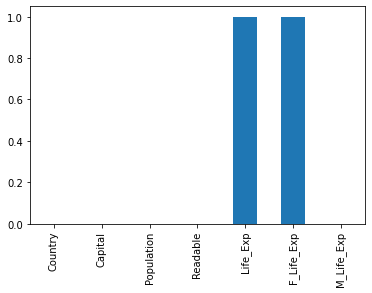

In [92]:
# add columns with some missing values
r_copy["Life_Exp"] = [81.54, 84.07, 84.85, np.nan, 78.02, 81.45]
r_copy["F_Life_Exp"] = [83.88, 85.85, 87.88, 73.86, np.nan, 83.33]
r_copy["M_Life_Exp"] = [79.21, 82.28, 81.83, 70.73, 75.25, 79.54]

# check individual values for missing values
#print(r_copy.isna())

# check each column for missing values
print(r_copy.isna().any())

# bar plot of missing values by variable
r_copy.isna().sum().plot(kind="bar")

In [93]:
# remove rows with missing values
r_complete = r_copy.dropna()

# check if any columns contain missing values
print(r_complete.isna().any())

Country       False
Capital       False
Population    False
Readable      False
Life_Exp      False
F_Life_Exp    False
M_Life_Exp    False
dtype: bool


#### 7) Aggregating Data

- __Summary Statistics:__ Summary statistics, such as mean, median, minimum, maximum, and standard deviation, allows to get a better sense of data. While Pandas and NumPy provide such many functions to summarize the data, the ```.agg()``` method allows applying custom functions as well as applying functions to more than one column of a DataFrame at once, making aggregations very efficient.

In [17]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
world = pd.read_csv('data/world_development.csv', index_col=0)

# print the info about the World Development DataFrame
print(world.info())

# print the mean of BMI
print("Mean BMI:", world["BMI"].mean())

# print the median of BMI
print("Median BMI:", world["BMI"].median())

# print the maximum population in millions
print("Max Population (M):", world["Population_mln"].max())

# print the minimum population in millions
print("Min Population (M):", world["Population_mln"].min())

# define a custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# print IQR of the population in millions
print("IQR of Population (M):", world["Population_mln"].agg(iqr))

<class 'pandas.core.frame.DataFrame'>
Index: 2864 entries, 0 to 2863
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2864 non-null   object 
 1   Region                     2864 non-null   object 
 2   Year                       2864 non-null   int64  
 3   Alcohol_consumption        2864 non-null   float64
 4   BMI                        2864 non-null   float64
 5   GDP_per_capita             2864 non-null   int64  
 6   Population_mln             2864 non-null   float64
 7   Schooling                  2864 non-null   float64
 8   Economy_status_Developed   2864 non-null   int64  
 9   Economy_status_Developing  2864 non-null   int64  
 10  Life_expectancy            2864 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 268.5+ KB
None
Mean BMI: 25.032925977653633
Median BMI: 25.5
Max Population (M): 1379.86
Min Population (M): 0.08
IQ

- __Counting and Grouping:__ Removing duplicates is essential to get accurate counts to avoid counting the same thing multiple times. ```.drop_duplicates()``` method allows to drop duplicates with respect to a defined subset. Counting allows to get an overview of data and to spot curiosities that might not be noticed otherwise. ```.value_counts()``` method allows to count numbers with respect to a column with specifying whther they should be normalized and sorted or not. The ```.groupby()``` method, on the other hand, allows to calculate grouped summary statistics.

In [63]:
# subset the rows where the economy status is developing and drop duplicate countries
developing_countries = world[world["Economy_status_Developing"] == 1].drop_duplicates(subset="Country")

# print the developing countries in North America
print("Developing Countries in North America:")
print(developing_countries[developing_countries["Region"] == "North America"]["Country"])

# get the proportion of developing countries in each region and sort
print("\nProportion of Developing Countries in Each Region:")
dev_props_sorted = developing_countries["Region"].value_counts(sort=True, normalize=True)
print(dev_props_sorted)

Developing Countries in North America:
328    Mexico
Name: Country, dtype: object

Proportion of Developing Countries in Each Region:
Region
Africa                           0.359155
Asia                             0.183099
Central America and Caribbean    0.133803
Middle East                      0.091549
South America                    0.084507
Rest of Europe                   0.077465
Oceania                          0.063380
North America                    0.007042
Name: proportion, dtype: float64


In [82]:
# group by region and get the sum of the population
pop_by_region = developing_countries.groupby("Region")["Population_mln"].sum()

# get proportion for each region
print("\nProportion of Developing Countries Population by Region:")
print(pop_by_region / sum(pop_by_region))


Proportion of Developing Countries Population by Region:
Region
Africa                           0.170869
Asia                             0.631887
Central America and Caribbean    0.014046
Middle East                      0.049830
North America                    0.018397
Oceania                          0.001996
Rest of Europe                   0.041256
South America                    0.071720
Name: Population_mln, dtype: float64


In [66]:
# for each region in developing countries, aggregate schooling: get min, max, mean, and median
print("\nSchooling (avg years that people aged 25+ spent in formal education) Stats of Developing Countries by Region:")
schooling_stats = developing_countries.groupby("Region")["Schooling"].agg(["min", "max", "mean", "median"])
print(schooling_stats)


Schooling (avg years that people aged 25+ spent in formal education) Stats of Developing Countries by Region:
                               min   max       mean  median
Region                                                     
Africa                         1.3   9.0   4.588235    4.00
Asia                           2.2  11.7   7.100000    7.40
Central America and Caribbean  4.3  11.0   7.836842    7.90
Middle East                    2.8   9.6   7.761538    8.60
North America                  7.0   7.0   7.000000    7.00
Oceania                        4.3  10.3   6.811111    6.50
Rest of Europe                 7.2  12.6  10.554545   10.80
South America                  6.5  10.1   8.150000    8.05


- __Pivot Tables:__ Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are created with ```.pivot_table()``` method, and they are essentially another way of performing grouped calculations as an alternative to ```.groupby()```. The __aggfunc__ argument of ```.pivot_table()``` takes in a list of functions (without parentheses) that can be used to summarize the values. __fill_value__ replaces missing values with a substitute dummy value. __margins__ is a shortcut to pivot by two variables, while pivoting by each of those variables separately: it gives the row and column totals of the pivot table contents.

In [55]:
# pivot for mean and median schooling for each region in developing countries
mean_med_schooling_by_region = developing_countries.pivot_table(values="Schooling", index="Region", aggfunc=["mean", "median"])
print("Mean and Median Schooling (avg years that people aged 25+ spent in formal education) for each Region in Developing Countries:")
print(mean_med_schooling_by_region)

Mean and Median Schooling (avg years that people aged 25+ spent in formal education) for each Region in Developing Countries:
                                    mean    median
                               Schooling Schooling
Region                                            
Africa                          4.588235      4.00
Asia                            7.100000      7.40
Central America and Caribbean   7.836842      7.90
Middle East                     7.761538      8.60
North America                   7.000000      7.00
Oceania                         6.811111      6.50
Rest of Europe                 10.554545     10.80
South America                   8.150000      8.05


In [77]:
# subset the rows where the economy status is developing for specified years
years = [2003, 2005, 2007]
developing_countries_by_years = world[(world["Economy_status_Developing"] == 1) & (world["Year"].isin(years))]

# print the schooling in developing countries by region and years
temp_dev_pivot = developing_countries_by_years.pivot_table(values="Schooling", index="Region", columns="Year", fill_value=0, margins=True)
print("Schooling (avg years that people aged 25+ spent in formal education) for Developing Countries by Region and by Year:")
print(temp_dev_pivot)

Schooling (avg years that people aged 25+ spent in formal education) for Developing Countries by Region and by Year:
Year                               2003       2005       2007        All
Region                                                                  
Africa                         4.174510   4.358824   4.541176   4.358170
Asia                           6.761538   6.961538   7.103846   6.942308
Central America and Caribbean  7.384211   7.531579   7.731579   7.549123
Middle East                    6.676923   6.938462   7.430769   7.015385
North America                  7.100000   7.600000   8.000000   7.566667
Oceania                        6.433333   6.577778   6.833333   6.614815
Rest of Europe                 9.781818  10.063636  10.309091  10.051515
South America                  7.625000   7.750000   7.800000   7.725000
All                            6.196479   6.388028   6.593662   6.392723


The column 'All' returns an overall mean for each year, not (2003+2005+2007)/3. That would be a mean of means, rather than an overall mean per year! A pivot table is a DataFrame with sorted indexes, so the techniques to subset them are the same as DataFrames.

In [80]:
# print the schooling in developing countries from Africa to Middle East, and from 2003 to 2005
print("Schooling (avg years that people aged 25+ spent in formal education) for Developing Countries from Africa to Middle East, and from 2003 to 2005:")
print(temp_dev_pivot.loc["Africa":"Middle East", 2003:2005])

Schooling (avg years that people aged 25+ spent in formal education) for Developing Countries from Africa to Middle East, and from 2003 to 2005:
Year                               2003      2005
Region                                           
Africa                         4.174510  4.358824
Asia                           6.761538  6.961538
Central America and Caribbean  7.384211  7.531579
Middle East                    6.676923  6.938462


Pivot tables are filled with summary statistics where further calculations can be performed on them.

In [81]:
# pivot for mean schooling for each region and each year in developing countries
schooling_by_region_year = developing_countries.pivot_table(values="Schooling", index="Region", columns="Year")

# get the mean temp by years
mean_schooling_by_year = schooling_by_region_year.mean(axis="columns")

# Filter for the region that had the lowest mean schooling
print(mean_schooling_by_year[mean_schooling_by_year == mean_schooling_by_year.min()])

Region
Africa    4.735095
dtype: float64


- __Unpivot Tables:__ In pandas, ```.melt()``` method is used to unpivot tables. It converts tables from wide format, where each row represents a separate element, to long format, where multiple rows represent the different features of the same element. It converts a DataFrame into a format where one or more columns are identifier variables (__id_vars__), while others are considered measured variables (__value_vars__). Measured variables are unpivoted by leaving just two columns, ```variable``` and ```value```, which can be renamed with __var_name__ and __value_name__ parameters.

#### 8) Combining Data
There are three different methods to combine DataFrames in Pandas:

- ```.merge()```: joins based on any specified columns, inner join by default
- ```.join()```: joins based on their indexes, left join by default
- ```.concat()```: stacks along the vertical or horizontal axis

##### Merge Data

To merge two or more DatraFrames, ```.merge()``` call is used. It supports several join types like ```left```, ```right```, ```inner```, ```outer``` and ```cross```. __how__ parameter is used to specify the join type. By default ```.merge()``` uses inner join on columns that are present on both DataFrames. It is also possible to specify the columns to join and join by row index. __on__ parameter specifies column(s) to join on, while __left_on__ and __right_on__ specifies column(s) from the left and the right DataFrame to use as key(s) for merging respectively. __sort__ parameter sorts the result DataFrame by the join keys if it is set to True. The syntax is as below:
```python
pandas.merge(left, right, on=None, how='inner', left_on=None, right_on=None, sort=False)
```
or
```python
left.merge(right, on=None, how='inner', left_on=None, right_on=None, sort=False)
```

In [105]:
# create dataframes from the dictionaries to observe various merge types
emp_dict = {
    'ID': ['0001', '0002', '0003', '0004', '0005', '0006'],
    'Name': ['Mack Anthony', 'Lily Walker', 'Xander Quinn', 'Valery Ayers', 'Jaylen Ware', 'Oliver Mendoza'],
    'DID': ['D001', 'D003', 'D001', 'D002', 'D006', 'D003'],
    'PID': ['ASST', 'MAN', 'EX', 'MAN', 'EN', 'ASST'],
}
employees = pd.DataFrame(emp_dict)

dept_dict = {
    'DID': ['D001', 'D002', 'D003', 'D004'],
    'DName': ['Sales', 'Admin', 'HR', 'Marketing'],
    'DFloor': [2, 1, 4, 3],
    'DLeadID': ['0003', '0004', '0002', '0008']
}
departments = pd.DataFrame(dept_dict)

pos_dict = {
    'PID': ['ASST', 'MAN', 'EN', 'EX'],
    'Position': ['Assistant', 'Manager', 'Engineer', 'Executive'],
    'Vacation': [20, 30, 30, 60],
    'Salary' : [30000, 60000, 40000, 120000]
}
positions = pd.DataFrame(pos_dict)

- __Inner Join:__ Inner joins only return the rows with matching values in both tables. ```.merge()``` call is used without or with __how__ parameter set to __"inner"__. The column to merge on is specified with __on__ parameter.

In [114]:
# merge the employees and departments tables
emp_dept = employees.merge(departments, on="DID")

# print the number of people in each department
print(emp_dept.groupby("DName")["DName"].count())

DName
Admin    1
HR       2
Sales    2
Name: DName, dtype: int64


To merge more than two DataFrames, consecutive ```.merge()``` calls are used. A single line of code can be extended over multiple lines by ending it with a backslash as below (with no element or space ater the backslash):

In [116]:
# merge the employees and departments tables on DID; and merge the positions on PID
emp_dept_pos = employees.merge(departments, on="DID") \
    .merge(positions, on="PID")
    
# print the emp_dept_pos without DID and PID
print(emp_dept_pos.set_index('ID').drop(columns=['DID', 'PID']))

                Name  DName  DFloor DLeadID   Position  Vacation  Salary
ID                                                                      
0001    Mack Anthony  Sales       2    0003  Assistant        20   30000
0002     Lily Walker     HR       4    0002    Manager        30   60000
0003    Xander Quinn  Sales       2    0003  Executive        60  120000
0004    Valery Ayers  Admin       1    0004    Manager        30   60000
0006  Oliver Mendoza     HR       4    0002  Assistant        20   30000


- __Left Join:__ A left (outer) join is useful to enhance or enrich a dataset, without losing any of the original data. Setting __how__ parameter __"left"__ with the ```.merge()``` method, it returns all of the rows of the left table, while using an inner join may result in lost data if it does not exist in both tables. The column to merge on is specified again with __on__ parameter.

In [125]:
# merge the employees and departments tables with a left join
emp_dept = employees.merge(departments, on="DID", how="left").set_index('ID')

# print the rows and shape of merged table
print(emp_dept)
print(emp_dept.shape)

                Name   DID   PID  DName  DFloor DLeadID
ID                                                     
0001    Mack Anthony  D001  ASST  Sales     2.0    0003
0002     Lily Walker  D003   MAN     HR     4.0    0002
0003    Xander Quinn  D001    EX  Sales     2.0    0003
0004    Valery Ayers  D002   MAN  Admin     1.0    0004
0005     Jaylen Ware  D006    EN    NaN     NaN     NaN
0006  Oliver Mendoza  D003  ASST     HR     4.0    0002
(6, 6)


- __Right Join:__ Setting __how__ parameter __"right"__ with the ```.merge()``` method performs a right (outer) join. It returns all of the rows of the right table, while only the rows with the keys in the left DataFrame that can be found in the right DataFrame will be displayed. The column to merge on is specified again with __on__ parameter.

In [124]:
# merge the employees and departments tables with a right join
emp_dept = employees.merge(departments, on="DID", how="right")

# print the emp_dept
print(emp_dept.set_index('ID').drop(columns=['DID']))

                Name   PID      DName  DFloor DLeadID
ID                                                   
0001    Mack Anthony  ASST      Sales       2    0003
0003    Xander Quinn    EX      Sales       2    0003
0004    Valery Ayers   MAN      Admin       1    0004
0002     Lily Walker   MAN         HR       4    0002
0006  Oliver Mendoza  ASST         HR       4    0002
NaN              NaN   NaN  Marketing       3    0008


- __Outer Join:__ An outer join returns all rows from both merged tables and null where they do not match. It is useful to find rows that do not have a match in the other table. Setting __how__ parameter __"outer"__ with the ```.merge()``` method, it returns all of the rows of the both tables. The column to merge on is specified again with __on__ parameter. 

In [127]:
# merge the employees and departments tables with a right join
emp_dept = employees.merge(departments, on="DID", how="outer")

# create an index that returns true if DID or DLeadID are null
missing = (emp_dept['DID'].isna() | emp_dept['DLeadID'].isna())

# print the missing info on emp_dept
print(emp_dept[missing].set_index('ID'))

             Name   DID PID DName  DFloor DLeadID
ID                                               
0005  Jaylen Ware  D006  EN   NaN     NaN     NaN


- __Self Join:__ Merging a table to itself is useful to compare values in a column to other values in the same column. The __suffixes__ parameter helps to separate the columns from both tables with the same name. If the column to merge on is with different names in two tables, __left_on__ and __right_on__ parameters are used to specify which are the same and to merge on.

In [136]:
# merge the employees and departments tables on DID
emp_dept = employees.merge(departments, on="DID")
    
# merge the emp_dept to self to obtain department lead names rather than id for each employee
emp_dept_complete = emp_dept.merge(emp_dept, left_on="DLeadID", right_on="ID", suffixes=("_emp", "_lead")) \
    .drop(columns=["ID_lead", "DID_lead", "DLeadID_emp", "PID_lead", "DName_lead", "DFloor_lead", "DLeadID_lead"])

# print the emp_dept_complete
print(emp_dept_complete)

  ID_emp        Name_emp DID_emp PID_emp DName_emp  DFloor_emp     Name_lead
0   0001    Mack Anthony    D001    ASST     Sales           2  Xander Quinn
1   0002     Lily Walker    D003     MAN        HR           4   Lily Walker
2   0003    Xander Quinn    D001      EX     Sales           2  Xander Quinn
3   0004    Valery Ayers    D002     MAN     Admin           1  Valery Ayers
4   0006  Oliver Mendoza    D003    ASST        HR           4   Lily Walker


##### Join Data

The ```.concat()``` method concatenates an arbitrary amount of Series or DataFrame objects along an axis while performing optional set logic (union or intersection) of the indexes on the other axes. It can concatenate both vertically and horizontally. The basic syntax is as below:

```python
pandas.concat(objs, *, axis=0, join="outer", ignore_index=False, keys=None, sort=False)
```
The __axis__ parameter specifies the axis to concatenate along. The default is __"0"__ and means to concatenate along the rows. __join__ parameter specifies the type of join, which may be set to __"outer"__(default), __"inner"__, __"left"__, or __"right"__. If __ignore_index__ parameter is set to True, it will reset the resulting object's index. The default value for it is False. The __keys__ parameter helps to build a hierarchical index, while __sort__ parameter sorts the result by the keys.

In [140]:
# create dataframes from the dictionaries to observe various join types
january = {
    'ID': ['10107', '10121', '10134'],
    'Quantity': [30, 34, 41],
    'UnitPrice': [95.7, 81.35, 94.74],
    'Date': ['1/2/2023', '1/7/2023', '1/30/2023'],
    'Status': ['Shipped', 'Shipped', 'Shipped'],
    'State': ['NY', 'CA', 'CA']
}
jan_ord = pd.DataFrame(january)

february = {
    'ID': ['10251', '10263', '10275'],
    'Quantity': [28, 34, 45],
    'UnitPrice': [100, 100, np.nan],
    'Date': ['2/5/2023', '2/7/2023', '2/25/2023'],
    'State': ['NJ', 'CT', 'MA']
}
feb_ord = pd.DataFrame(february)

march = {
    'ID': ['10206', '10215'],
    'Quantity': [47, 35],
    'UnitPrice': [100, 99],
    'Date': ['3/1/2023', '3/15/2023']
}
mar_ord = pd.DataFrame(march)

- __Outer Join:__  Takes the union of columns, while filling missing values with NaN.

In [ ]:
# concatenate the orders data where the index goes from 0 to n-1 and sort by index.
q1_ord = pd.concat([jan_ord, feb_ord, mar_ord], ignore_index=True, sort=True)

# print the concatenated order data
print(q1_ord)

        Date     ID  Quantity State   Status  UnitPrice
0   1/2/2023  10107        30    NY  Shipped      95.70
1   1/7/2023  10121        34    CA  Shipped      81.35
2  1/30/2023  10134        41    CA  Shipped      94.74
3   2/5/2023  10251        28    NJ      NaN     100.00
4   2/7/2023  10263        34    CT      NaN     100.00
5  2/25/2023  10275        45    MA      NaN        NaN
6   3/1/2023  10206        47   NaN      NaN     100.00
7  3/15/2023  10215        35   NaN      NaN      99.00


- __Inner Join:__  Takes the intersection of columns, while keeping only the common columns in all the tables.

In [142]:
# concatenate the orders data with columns that are only in all the tables
q1_ord = pd.concat([jan_ord, feb_ord, mar_ord], join="inner", sort=True)

# print the concatenated order data
print(q1_ord)

        Date     ID  Quantity  UnitPrice
0   1/2/2023  10107        30      95.70
1   1/7/2023  10121        34      81.35
2  1/30/2023  10134        41      94.74
0   2/5/2023  10251        28     100.00
1   2/7/2023  10263        34     100.00
2  2/25/2023  10275        45        NaN
0   3/1/2023  10206        47     100.00
1  3/15/2023  10215        35      99.00


Adding keys allows to analyze the data further with key levels.

            Date     ID  Quantity  UnitPrice    Total
Jan 0   1/2/2023  10107        30      95.70  2871.00
    1   1/7/2023  10121        34      81.35  2765.90
    2  1/30/2023  10134        41      94.74  3884.34
Feb 0   2/5/2023  10251        28     100.00  2800.00
    1   2/7/2023  10263        34     100.00  3400.00
    2  2/25/2023  10275        45        NaN      NaN
Mar 0   3/1/2023  10206        47     100.00  4700.00
    1  3/15/2023  10215        35      99.00  3465.00


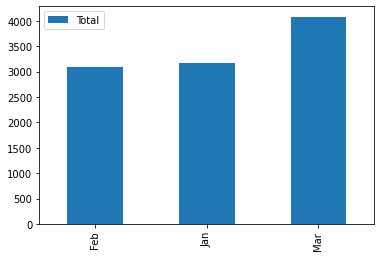

In [145]:
# concatenate the orders data with keys
q1_ord = pd.concat([jan_ord, feb_ord, mar_ord], join="inner", keys=["Jan", "Feb", "Mar"], sort=True)

# add a total column to find the total sales
q1_ord["Total"] = q1_ord["Quantity"] * q1_ord["UnitPrice"]

# print the concatenated order data
print(q1_ord)

# group the orders by the index keys and find avg of the total column
avg_by_month = q1_ord.groupby(level=0).agg({"Total":"mean"})

# bar plot of avg_by_month
avg_by_month.plot(kind="bar")
plt.show()